Valores NaN no dataframe:
ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings        10
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Time_Orderd                     0
Time_Order_picked               0
Weatherconditions               0
Road_traffic_density            0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
multiple_deliveries            52
Festival                        0
City                            0
Time_taken(min)                 0
dtype: int64
**************************************************
Média do tempo de entrega: 25.54
Mediana do tempo de entrega: 25.00
Desvio padrão do tempo de entrega: 8.53
**************************************************


<ipython-input-2-5a8c7bdfb68f>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


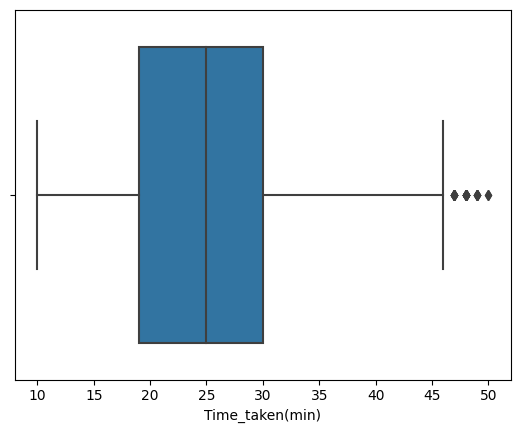

Correlações entre 'Time_taken(min)' e outras colunas numéricas (sem outliers):
Time_taken(min)                1.000000
multiple_deliveries            0.316485
Delivery_person_Age            0.285499
Delivery_location_latitude     0.066849
Restaurant_latitude            0.065335
Type_of_order                  0.012108
Delivery_location_longitude   -0.010144
Restaurant_longitude          -0.013658
Type_of_vehicle               -0.082700
Weatherconditions             -0.153396
Road_traffic_density          -0.194240
City                          -0.221202
Vehicle_condition             -0.251982
Delivery_person_Ratings       -0.335739
Festival                            NaN
Name: Time_taken(min), dtype: float64

Positivamente correlacionadas: As variáveis 'multiple_deliveries' (0,317), 'Delivery_person_Age' (0,287), 'Delivery_location_latitude' (0,072) e 'Restaurant_latitude' (0,071) têm correlação positiva com o tempo de entrega.
 Isso significa que, à medida que o valor dessas variáveis 

<ipython-input-2-5a8c7bdfb68f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Festival'] = df_no_outliers['Festival'].map({'Não': 0, 'Sim': 1})


In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro



# Definir constantes
ALPHA = 0.05

# Carregar os dados
df = pd.read_excel('encoded_cleaned_test_gitup.xlsx')

# Verificar se há valores NaN no dataframe e remover linhas com NaN
print("Valores NaN no dataframe:")
print(df.isna().sum())
df = df.dropna()

# Calcular o IQR para cada coluna e filtrar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Medir: Calcular estatísticas descritivas para o tempo de entrega
time_taken_mean_no_outliers = df_no_outliers["Time_taken(min)"].mean()
time_taken_median_no_outliers = df_no_outliers["Time_taken(min)"].median()
time_taken_std_no_outliers = df_no_outliers["Time_taken(min)"].std()
print("*"*50)
print(f"Média do tempo de entrega: {time_taken_mean_no_outliers:.2f}")
print(f"Mediana do tempo de entrega: {time_taken_median_no_outliers:.2f}")
print(f"Desvio padrão do tempo de entrega: {time_taken_std_no_outliers:.2f}")
print("*"*50)

# Analisar: Visualizar a distribuição do tempo de entrega e verificar se há outliers
sns.boxplot(x=df_no_outliers["Time_taken(min)"])
plt.show()

# Calcular as correlações no dataframe sem outliers
correlations_no_outliers = df_no_outliers.corr()["Time_taken(min)"].sort_values(ascending=False)
print("Correlações entre 'Time_taken(min)' e outras colunas numéricas (sem outliers):")
print(correlations_no_outliers)

print("""
Positivamente correlacionadas: As variáveis 'multiple_deliveries' (0,317), 'Delivery_person_Age' (0,287), 'Delivery_location_latitude' (0,072) e 'Restaurant_latitude' (0,071) têm correlação positiva com o tempo de entrega.\n Isso significa que, à medida que o valor dessas variáveis aumenta, o tempo de entrega também tende a aumentar.

Negativamente correlacionadas: As variáveis 'Delivery_person_Ratings' (-0,337), 'Vehicle_condition' (-0,249), 'City' (-0,219), 'Road_traffic_density' (-0,192), 'Weatherconditions' (-0,155), 'Type_of_vehicle' (-0,082), 'Delivery_location_longitude' (-0,008) e 'Restaurant_longitude' (-0,012) têm correlação negativa com o tempo de entrega. \n Isso significa que, à medida que o valor dessas variáveis aumenta, o tempo de entrega tende a diminuir.

Baixa correlação: A variável 'Type_of_order' (0,017) tem uma correlação próxima a zero, o que indica que não há uma relação linear clara entre essa variável e o tempo de entrega.")

""")


#Converter a coluna 'Festival' em uma coluna numérica (por exemplo, 0 para 'Não' e 1 para 'Sim')
df_no_outliers['Festival'] = df_no_outliers['Festival'].map({'Não': 0, 'Sim': 1})


print("\n")
print("*"*50)
print("Análise da Regressão nos Outliers:")
print("""
R-squared e Adj. R-squared: O valor de R-squared é 0,410, o que indica que aproximadamente 41% da variabilidade na variável dependente (Time_taken(min)) pode ser explicada pelas variáveis independentes no modelo. \n O valor ajustado de R-squared, que leva em consideração o número de variáveis e o tamanho da amostra, também é próximo de 0,410, indicando um ajuste razoável do modelo.

P>|t|: Essa coluna indica a significância das variáveis independentes no modelo. Valores menores que 0,05 sugerem que a variável é estatisticamente significativa. \nNesse caso, Delivery_person_Ratings, Vehicle_condition, Weatherconditions, Delivery_person_Age, multiple_deliveries e Road_traffic_density são estatisticamente significativos, pois seus valores P são menores que 0,05.

Coeficientes: Os coeficientes mostram a relação entre a variável dependente e cada variável independente, mantendo outras constantes. \n Por exemplo, um aumento de uma unidade no Delivery_person_Ratings está associado a uma diminuição de 8,8666 unidades no tempo de entrega (Time_taken(min)), mantendo constantes todas as outras variáveis.
""")

#Realizar o teste de Shapiro-Wilk na coluna 'Time_taken(min)'
shapiro_test = shapiro(df_no_outliers['Time_taken(min)'])

print("\n")
print("="*50)
print("Teste de Normalidade:")
print("Estatística de Shapiro-Wilk:", shapiro_test[0])
print("Valor-p de Shapiro-Wilk:", shapiro_test[1])
print("\n")
print("="*50)

#Analisar o resultado do teste de normalidade
print("Como o valor-p é menor que 0,05 (ou 5%), rejeitamos a hipótese nula. Isso significa que há evidências suficientes para afirmar que a coluna 'Time_taken(min)' não tem uma distribuição normal.")


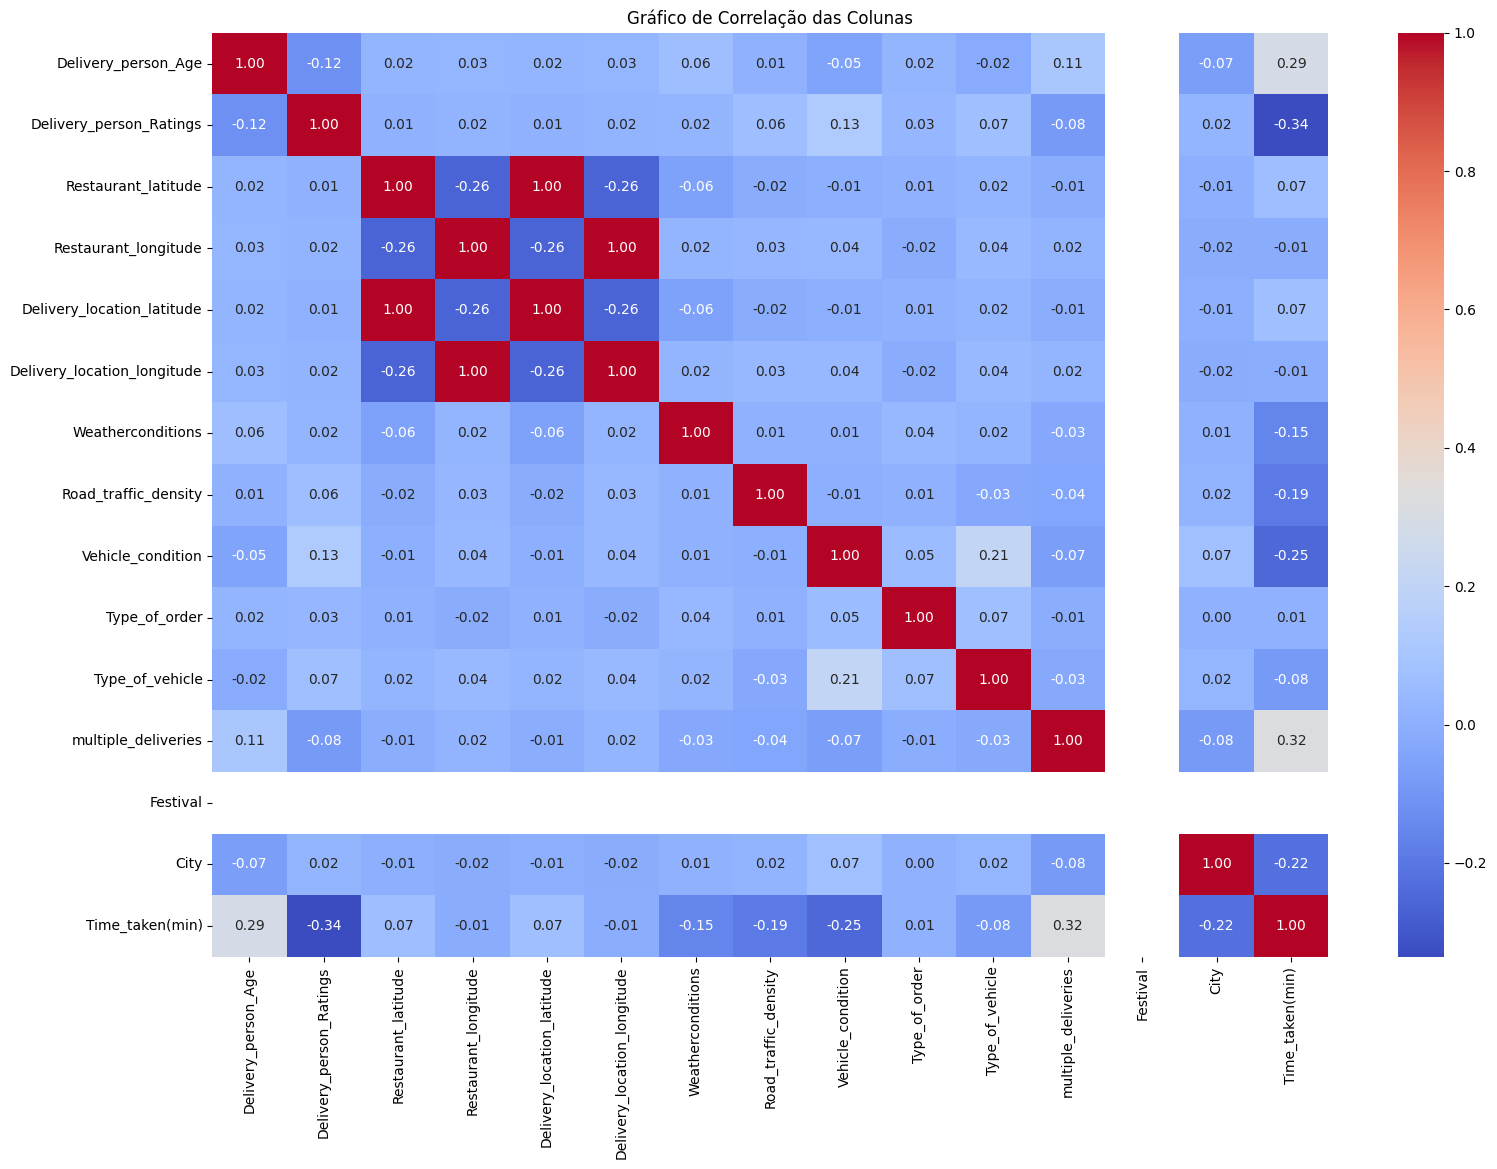

In [5]:
# Calcular a matriz de correlação
correlation_matrix = df_no_outliers.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(18, 12))

# Gerar o gráfico de correlação usando Seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')

# Configurar o título e exibir o gráfico
plt.title("Gráfico de Correlação das Colunas")
plt.show()





In [9]:
import statsmodels.api as sm

# Função para realizar a Eliminação Progressiva
def backward_elimination(X, y, significance_level=0.05):
    X = X.copy()
    num_vars = X.shape[1]
    
    for i in range(0, num_vars):
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)
        max_p_value_feature = model.pvalues.idxmax()

        if max_p_value > significance_level:
            X = X.drop(columns=[max_p_value_feature])
        else:
            break

    return X

# Selecione as colunas numéricas para a análise de regressão
X = df_no_outliers[[
    'Delivery_location_latitude',
    'Restaurant_latitude',
    'Delivery_location_longitude',
    'Restaurant_longitude',
    'Delivery_person_Ratings',
    'Type_of_order',
    'Vehicle_condition',
    'Weatherconditions',
    'Delivery_person_Age',
    'multiple_deliveries',
    'Road_traffic_density'
]]
y = df_no_outliers['Time_taken(min)']

# Adicionar uma constante ao conjunto de recursos (necessário para a regressão linear múltipla)
X = sm.add_constant(X)

# Realizar a Eliminação Progressiva
X_optimal = backward_elimination(X, y)

# Ajustar o modelo de regressão linear múltipla com as variáveis ótimas
model_optimal = sm.OLS(y, X_optimal).fit()

# Imprimir o resumo das estatísticas do modelo ótimo
print(model_optimal.summary())



print('/n')
print('='*50)
print("fórmula")
print("Time_taken(min) = 52.0218 + 0.0651 * Restaurant_latitude + 64.1109 * Delivery_location_longitude - 64.0730 * Restaurant_longitude - 8.8778 * Delivery_person_Ratings - 2.0913 * Vehicle_condition - 0.6953 * Weatherconditions + 0.3864 * Delivery_person_Age + 3.7010 * multiple_deliveries - 1.8565 * Road_traffic_density")

                            OLS Regression Results                            
Dep. Variable:        Time_taken(min)   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          4.80e-194
Time:                        15:37:06   Log-Likelihood:                -5863.8
No. Observations:                1777   AIC:                         1.175e+04
Df Residuals:                    1767   BIC:                         1.180e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             